<a href="https://colab.research.google.com/github/Arjun650/MachineLearning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [2]:
!pip install xgboost


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# print(stopwords.words('english')) printing the stopwords in english

**Data Preprocessing**


In [4]:
# loading the dataset to a pandas Dataframe

viva_dataset = pd.read_csv('/content/drive/MyDrive/grouped_transcripts_with_timestamps.csv')

In [5]:
viva_dataset.shape

(2171, 4)

In [ ]:
viva_dataset.head()

,Start Time Stamp,End Time Stamp,Label,Transcript
0,00:00:04,00:00:15,Statement,Yeah. So can you tell me now? We'll go one aft...
1,00:00:19,00:00:19,Question,What is sampling? What is sampling?
2,00:00:26,00:00:26,Answer,Sampling means it is the process of converting...
3,00:00:33,00:00:39,Statement,OK. So suppose you sample a signal at. 10 kilo...
4,00:00:41,00:00:41,Question,What is the maximum frequency which will be av...


In [6]:
label_mapping = {"Statement" : 1, "Question" : 2, "Answer" : 0}
viva_dataset['Label_Num'] = viva_dataset['Label'].map(label_mapping)
print(viva_dataset.head())

  Start Time Stamp End Time Stamp      Label  \
0         00:00:04       00:00:15  Statement   
1         00:00:19       00:00:19   Question   
2         00:00:26       00:00:26     Answer   
3         00:00:33       00:00:39  Statement   
4         00:00:41       00:00:41   Question   

                                          Transcript  Label_Num  
0  Yeah. So can you tell me now? We'll go one aft...          1  
1                What is sampling? What is sampling?          2  
2  Sampling means it is the process of converting...          0  
3  OK. So suppose you sample a signal at. 10 kilo...          1  
4  What is the maximum frequency which will be av...          2  


In [ ]:
# counting the no. of missing values in dataset
viva_dataset.isnull().sum()


,0
Start Time Stamp,0
End Time Stamp,0
Label,0
Transcript,0
Label_Num,0


In [7]:
# seperating the data and label
X = viva_dataset.drop(columns = 'Label_Num')
Y = viva_dataset['Label_Num']


In [ ]:
print(X)
print(Y)

     Start Time Stamp End Time Stamp      Label  \
0            00:00:04       00:00:15  Statement   
1            00:00:19       00:00:19   Question   
2            00:00:26       00:00:26     Answer   
3            00:00:33       00:00:39  Statement   
4            00:00:41       00:00:41   Question   
...               ...            ...        ...   
2166         00:10:22       00:10:22   Question   
2167         00:10:24       00:10:24     Answer   
2168         00:10:28       00:10:29  Statement   
2169         00:10:32       00:10:32   Question   
2170         00:10:33       00:10:36  Statement   

                                             Transcript  
0     Yeah. So can you tell me now? We'll go one aft...  
1                   What is sampling? What is sampling?  
2     Sampling means it is the process of converting...  
3     OK. So suppose you sample a signal at. 10 kilo...  
4     What is the maximum frequency which will be av...  
...                                    

**Stremming Procedure**

In [ ]:
# def preprocess_text(text):
#     # Lowercase
#     text = text.lower()

#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Remove numbers
#     text = re.sub(r'\d+', '', text)

#     # Remove special characters
#     text = re.sub(r'\W', ' ', text)

#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     text = ' '.join([word for word in text.split() if word not in stop_words])

#     # Tokenization
#     tokens = word_tokenize(text)

#     # Stemming or Lemmatization (choose one)
#     stemmer = PorterStemmer()
#     tokens = [stemmer.stem(token) for token in tokens]

#     # Or use Lemmatization
#     # lemmatizer = WordNetLemmatizer()
#     # tokens = [lemmatizer.lemmatize(token) for token in tokens]

#     # Join tokens back into a single string
#     return ' '.join(tokens)

# # Apply preprocessing to the 'Transcript' column

# def preprocess_text(text):
    # Lowercase
    # text = text.lower()

    # Remove punctuation
    # text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    # text = re.sub(r'\d+', '', text)

    # Remove special characters (this may not be necessary as punctuation removal already does this)
    # text = re.sub(r'\W', ' ', text)  # Uncomment if you want to enforce removal of non-word characters

    # Remove stopwords


    # Join tokens back into a single string
    # return text

In [ ]:
# viva_dataset['Transcript'] = viva_dataset['Transcript'].apply(preprocess_text)

In [ ]:
viva_dataset['Transcript']

,Transcript
0,Yeah. So can you tell me now? We'll go one aft...
1,What is sampling? What is sampling?
2,Sampling means it is the process of converting...
3,OK. So suppose you sample a signal at. 10 kilo...
4,What is the maximum frequency which will be av...
...,...
2166,You can't use black and white.
2167,"Yes, Sir."
2168,"OK. Thank you very much. So basically, yes Sir."
2169,You are saying something?


In [8]:
#seperating the data and label
X = viva_dataset['Transcript'].values
Y = viva_dataset['Label_Num'].values

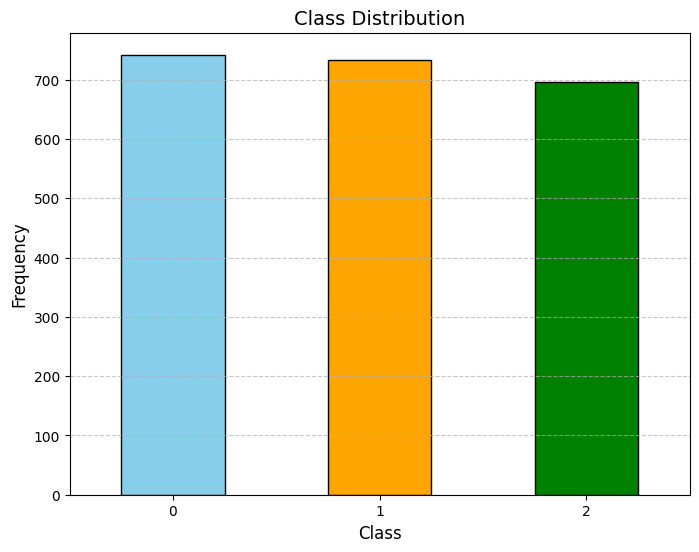

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset


# Replace 'class_column' with the name of your class column
class_distribution = viva_dataset['Label_Num'].value_counts()

# Plot the class balance
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'], edgecolor='black')

# Add labels and title
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [ ]:
print(X)
# print(Y)

["Yeah. So can you tell me now? We'll go one after another. First, we'll start with the udhab Bhaskar. Then we'll go to Balaji. OK. OK, OK. Yeah. So tell me."
 'What is sampling? What is sampling?'
 'Sampling means it is the process of converting a continual signal into discrete signal.'
 ... 'OK. Thank you very much. So basically, yes Sir.'
 'You are saying something?'
 'No, Sir. No, Sir. Thank you. Have a good evening. Bye.']


In [ ]:
# 1. Converting the textual data into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 76)	0.16697729254574878
  (0, 139)	0.16086252006238766
  (0, 205)	0.22646747584056884
  (0, 244)	0.23857389443856233
  (0, 308)	0.08997807020692612
  (0, 828)	0.16697729254574878
  (0, 907)	0.3195533024588154
  (0, 1187)	0.4204993823138716
  (0, 1251)	0.25254319469211434
  (0, 1387)	0.13417481465665815
  (0, 1415)	0.2533458553295778
  (0, 1419)	0.11682636510060934
  (0, 1889)	0.14887776855648635
  (0, 1945)	0.1876733518368459
  (0, 2055)	0.2740411914738432
  (0, 2079)	0.06462058836743381
  (0, 2083)	0.12298717938508329
  (0, 2113)	0.08402388721151874
  (0, 2167)	0.23857389443856233
  (0, 2263)	0.2648314468236312
  (0, 2298)	0.12524779068903916
  (0, 2316)	0.24005702619246888
  (0, 2320)	0.06556002187940836
  (1, 1087)	0.32018735060749043
  (1, 1774)	0.8618090503032196
  :	:
  (2166, 2286)	0.6012425772314044
  (2166, 2320)	0.18662235469912017
  (2167, 1864)	0.6485993546365192
  (2167, 2318)	0.7611300001741429
  (2168, 215)	0.4244541400949689
  (2168, 1325)	0.453291136692298
  (216

In [ ]:
# Splitting data to training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

Training Accuracy: 73.27%
Test Accuracy: 52.64%


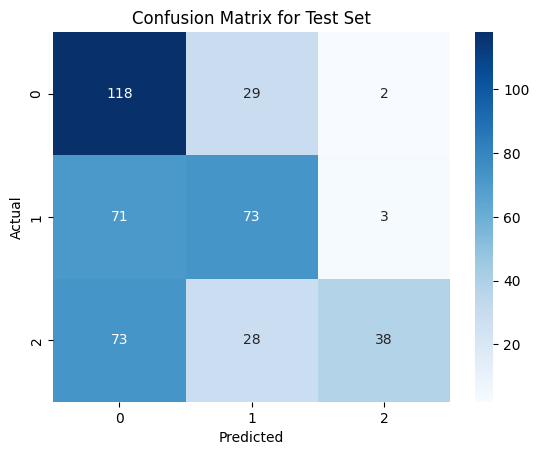

Precision: 62.64
Recall: 52.64
F1 Score: 50.82


In [ ]:

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, Y_train)

# Predicting on the training set
Y_train_pred = knn_model.predict(X_train)

# Predicting on the test set
Y_test_pred = knn_model.predict(X_test)

# Calculating accuracy for the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Calculating accuracy for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix for the test set
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Calculating precision, recall, and F1 score
precision = precision_score(Y_test, Y_test_pred, average='weighted')
recall = recall_score(Y_test, Y_test_pred, average='weighted')
f1 = f1_score(Y_test, Y_test_pred, average='weighted')

print(f'Precision: {precision * 100:.2f}')
print(f'Recall: {recall * 100:.2f}')
print(f'F1 Score: {f1 * 100:.2f}')


Best Hyperparameters: {'n_neighbors': 29, 'p': 2, 'weights': 'distance'}
Training Accuracy with Best Model: 98.33%
Test Accuracy with Best Model: 73.10%


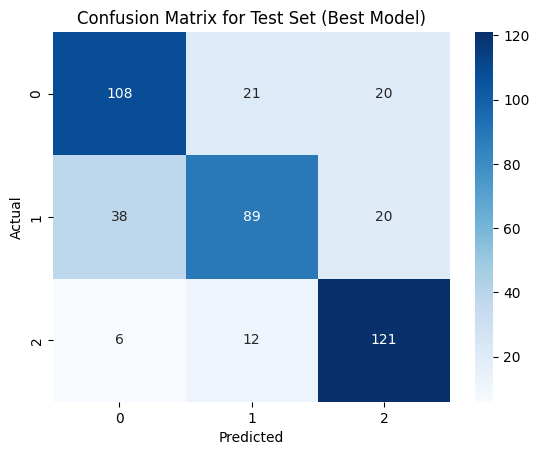

Precision: 73.01
Recall: 73.10
F1 Score: 72.72


In [ ]:
param_grid = {
    'n_neighbors': range(1, 31),      # Try different values of n_neighbors (1 to 30)
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'p': [1, 2]                        # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Predicting on the training set
Y_train_pred = best_knn_model.predict(X_train)

# Predicting on the test set
Y_test_pred = best_knn_model.predict(X_test)

# Calculating accuracy for the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f'Training Accuracy with Best Model: {train_accuracy * 100:.2f}%')

# Calculating accuracy for the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

# Confusion matrix for the test set
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set (Best Model)')
plt.show()


# Calculating precision, recall, and F1 score
precision = precision_score(Y_test, Y_test_pred, average='weighted')
recall = recall_score(Y_test, Y_test_pred, average='weighted')
f1 = f1_score(Y_test, Y_test_pred, average='weighted')

print(f'Precision: {precision * 100:.2f}')
print(f'Recall: {recall * 100:.2f}')
print(f'F1 Score: {f1 * 100:.2f}')

Best Hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 27}
Training Accuracy with Best Model: 98.33%
Test Accuracy with Best Model: 72.64%


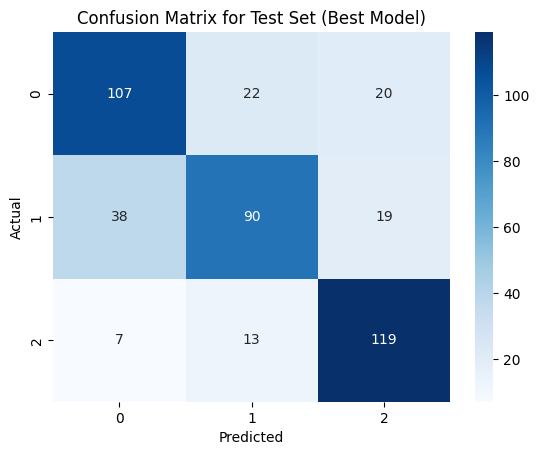

Precision: 72.51
Recall: 72.64
F1 Score: 72.32


In [ ]:
def knn_with_random_search(X_train, Y_train, X_test, Y_test):
    # Define hyperparameter distribution for RandomizedSearchCV
    param_dist = {
        'n_neighbors': range(1, 31),            # n_neighbors between 1 and 30
        'weights': ['uniform', 'distance'],     # Uniform or distance-based weighting
        'p': [1, 2]                             # Manhattan distance (p=1) or Euclidean distance (p=2)
    }

    # Create the KNN model
    knn_model = KNeighborsClassifier()

    # Set up RandomizedSearchCV with 5-fold cross-validation
    random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist,
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

    # Fit RandomizedSearchCV on the training data
    random_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params = random_search.best_params_
    print(f"Best Hyperparameters: {best_params}")

    # Get the best model from RandomizedSearchCV
    best_knn_model = random_search.best_estimator_

    # Predicting on the training set
    Y_train_pred = best_knn_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = best_knn_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy with Best Model: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set (Best Model)')
    plt.show()

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

# Example of usage:
knn_with_random_search(X_train, Y_train, X_test, Y_test)

Training Accuracy: 89.29%
Test Accuracy: 74.71%


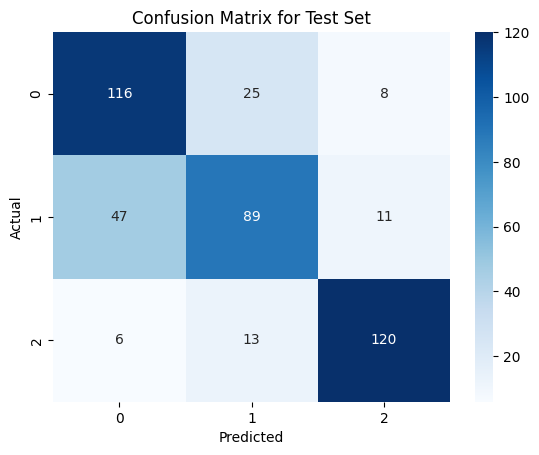

Precision: 74.78
Recall: 74.71
F1 Score: 74.53


In [ ]:
# def sigmoid(z):
#     """Compute the sigmoid function."""
#     # return 1 / (1 + np.exp(-z.toarray() if hasattr(z, 'toarray') else -z))
#     if isinstance(z, np.ndarray):  # If it's a dense array, directly apply np.exp
#         return 1 / (1 + np.exp(-z))
#     else:  # Convert sparse matrix to dense before applying np.exp
#         return 1 / (1 + np.exp(-z.toarray()))

# def fit(X, y, learning_rate=0.01, num_iterations=1000):
#     """Fit the logistic regression model."""
#     num_samples, num_features = X.shape
#     weights = np.zeros(num_features)
#     bias = 0

#     # Gradient descent
#     for _ in range(num_iterations):
#         linear_model = np.dot(X, weights) + bias
#         y_predicted = sigmoid(linear_model)

#         # Compute gradients
#         dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
#         db = (1 / num_samples) * np.sum(y_predicted - y)

#         # Update weights and bias
#         weights -= learning_rate * dw
#         bias -= learning_rate * db

#     return weights, bias

# def predict(X, weights, bias):
#     """Make predictions using the learned model."""
#     linear_model = np.dot(X, weights) + bias
#     y_predicted = sigmoid(linear_model)
#     predicted_classes = [1 if i > 0.5 else 0 for i in y_predicted]
#     return np.array(predicted_classes)

# def evaluate(X, y, weights, bias):
#     """Evaluate the model using accuracy."""
#     y_pred = predict(X, weights, bias)
#     return accuracy_score(y, y_pred)

def train_logistic_regression(X_train, Y_train):
    # Train a logistic regression model.
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    return model

def predict(model, X):
    # Make predictions using the trained logistic regression model.
    return model.predict(X)

def evaluate_accuracy(Y_true, Y_pred):
    # Evaluate and return the accuracy of the model.
    accuracy = accuracy_score(Y_true, Y_pred)
    return accuracy

def plot_confusion_matrix(Y_true, Y_pred):
    # Plot the confusion matrix as a heatmap.
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Train the model
log_reg_model = train_logistic_regression(X_train, Y_train)

# Make predictions
Y_train_pred = predict(log_reg_model, X_train)
Y_test_pred = predict(log_reg_model, X_test)

# Evaluate and print training accuracy
train_accuracy = evaluate_accuracy(Y_train, Y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate and print test accuracy
test_accuracy = evaluate_accuracy(Y_test, Y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot confusion matrix for test set
plot_confusion_matrix(Y_test, Y_test_pred)

precision = precision_score(Y_test, Y_test_pred, average='weighted')
recall = recall_score(Y_test, Y_test_pred, average='weighted')
f1 = f1_score(Y_test, Y_test_pred, average='weighted')

print(f'Precision: {precision * 100:.2f}')
print(f'Recall: {recall * 100:.2f}')
print(f'F1 Score: {f1 * 100:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/

Training Accuracy with Best Model: 81.97%
Test Accuracy with Best Model: 74.02%
Precision: 74.28
Recall: 74.02
F1 Score: 73.74


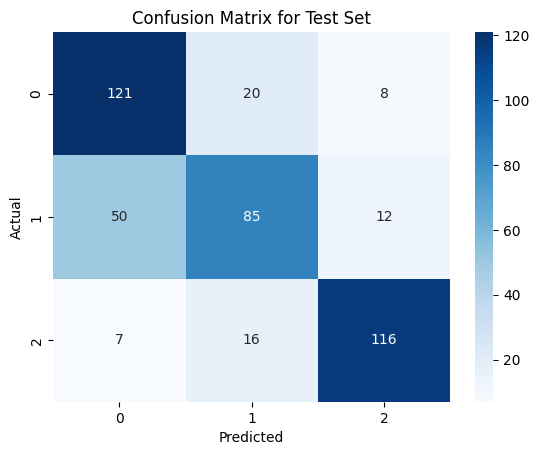

In [ ]:
def logistic_regression_with_random_search(X_train, Y_train):
    # Define hyperparameter distribution for RandomizedSearchCV
    param_dist = {
        'penalty': ['l1', 'l2', 'elasticnet'],         # Removed 'none'
        'C': [0.1, 1, 10, 100, 1000],                  # Regularization strength
        'solver': ['liblinear', 'saga'],                # Solvers: liblinear (supports l1/l2), saga (supports elasticnet)
        'max_iter': [100, 200, 300],                    # Maximum iterations for convergence
        'l1_ratio': [0.0, 0.5, 1.0]                    # Only used for 'elasticnet' penalty
    }

    # Create the Logistic Regression model
    log_reg_model = LogisticRegression()

    # Set up RandomizedSearchCV with 5-fold cross-validation
    random_search = RandomizedSearchCV(estimator=log_reg_model, param_distributions=param_dist,
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

    # Fit RandomizedSearchCV on the training data
    random_search.fit(X_train, Y_train)

    # Filter out incompatible parameters (e.g., using l1_ratio with non-elasticnet penalty)
    def filter_invalid_params(params):
        if params['penalty'] != 'elasticnet':
            params['l1_ratio'] = None
        if params['penalty'] == 'elasticnet' and params['solver'] == 'liblinear':
            return False
        return True

    # Filter best_params to avoid mismatches
    best_params = random_search.best_params_
    if not filter_invalid_params(best_params):
        print("Invalid hyperparameter combination found, retrying search.")
        random_search = RandomizedSearchCV(estimator=log_reg_model, param_distributions=param_dist,
                                           n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_train, Y_train)

    # Get the best model from RandomizedSearchCV
    best_log_reg_model = random_search.best_estimator_

    return best_log_reg_model

# Function to make predictions
def predict(model, X):
    return model.predict(X)

# Function to evaluate accuracy
def evaluate_accuracy(Y_true, Y_pred):
    return accuracy_score(Y_true, Y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(Y_true, Y_pred):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage
def logistic_regression_pipeline(X_train, Y_train, X_test, Y_test):
    # Train the model with hyperparameter tuning
    best_log_reg_model = logistic_regression_with_random_search(X_train, Y_train)

    # Make predictions on training and test data
    Y_train_pred = predict(best_log_reg_model, X_train)
    Y_test_pred = predict(best_log_reg_model, X_test)

    # Evaluate and print training accuracy
    train_accuracy = evaluate_accuracy(Y_train, Y_train_pred)
    print(f'Training Accuracy with Best Model: {train_accuracy * 100:.2f}%')

    # Evaluate and print test accuracy
    test_accuracy = evaluate_accuracy(Y_test, Y_test_pred)
    print(f'Test Accuracy with Best Model: {test_accuracy * 100:.2f}%')

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

    # Plot confusion matrix for the test set
    plot_confusion_matrix(Y_test, Y_test_pred)

# Call this with your dataset like so:
logistic_regression_pipeline(X_train, Y_train, X_test, Y_test)

Training Accuracy: 90.55%
Test Accuracy: 75.17%
Precision: 75.37
Recall: 75.17
F1 Score: 74.93


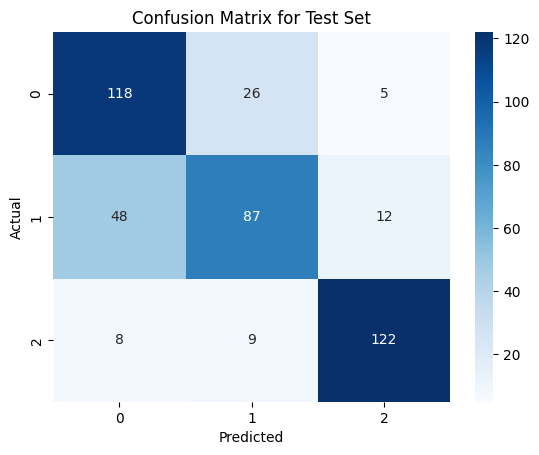

In [ ]:
def svm_classifier(X_train, Y_train, X_test, Y_test):

    # Initialize the SVM model with a linear kernel
    svm_model = SVC(kernel='linear')  # You can adjust the kernel type (e.g., 'rbf', 'poly')

    # Train the model on the training data
    svm_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = svm_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = svm_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
svm_classifier(X_train, Y_train, X_test, Y_test)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Training Accuracy: 95.91%
Test Accuracy: 76.55%
Precision: 76.86
Recall: 76.55
F1 Score: 76.26


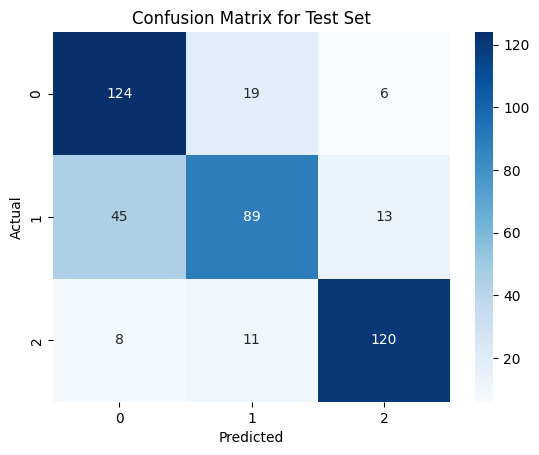

In [ ]:
def svm_classifier(X_train, Y_train, X_test, Y_test):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
        'kernel': ['linear', 'rbf', 'poly']  # Kernel type
    }

    # Initialize the SVM model
    svm_model = SVC()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predicting on the training set with the best model
    Y_train_pred = grid_search.predict(X_train)

    # Predicting on the test set with the best model
    Y_test_pred = grid_search.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
svm_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 98.33%
Test Accuracy: 74.25%
Precision: 74.60
Recall: 74.25
F1 Score: 74.06


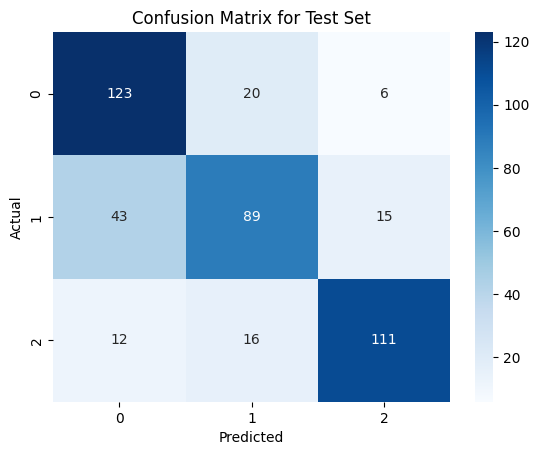

In [ ]:
def decision_tree_classifier(X_train, Y_train, X_test, Y_test):


    # Initialize the Decision Tree model
    dt_model = DecisionTreeClassifier()  # You can adjust parameters like max_depth, criterion, etc.

    # Train the model on the training data
    dt_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = dt_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = dt_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
decision_tree_classifier(X_train, Y_train, X_test, Y_test)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training Accuracy: 96.66%
Test Accuracy: 74.71%
Precision: 75.03
Recall: 74.71
F1 Score: 74.59


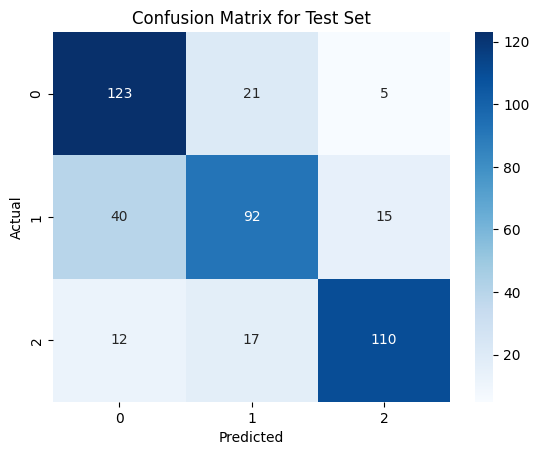

In [ ]:
def decision_tree_classifier(X_train, Y_train, X_test, Y_test):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
        'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 5, 10]   # Minimum number of samples required to be at a leaf node
    }

    # Initialize the Decision Tree model
    dt_model = DecisionTreeClassifier()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predicting on the training set with the best model
    Y_train_pred = grid_search.predict(X_train)

    # Predicting on the test set with the best model
    Y_test_pred = grid_search.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
decision_tree_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 98.33%
Test Accuracy: 77.93%


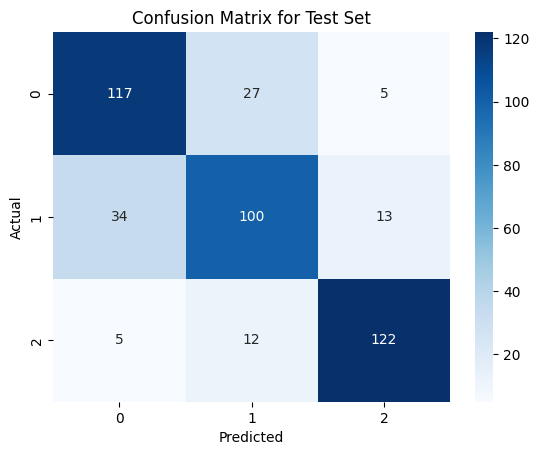

In [ ]:
def random_forest_classifier(X_train, Y_train, X_test, Y_test):

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier()  # You can adjust parameters like n_estimators, max_depth, etc.

    # Train the model on the training data
    rf_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = rf_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = rf_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
random_forest_classifier(X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 92.22%
Test Accuracy: 75.86%


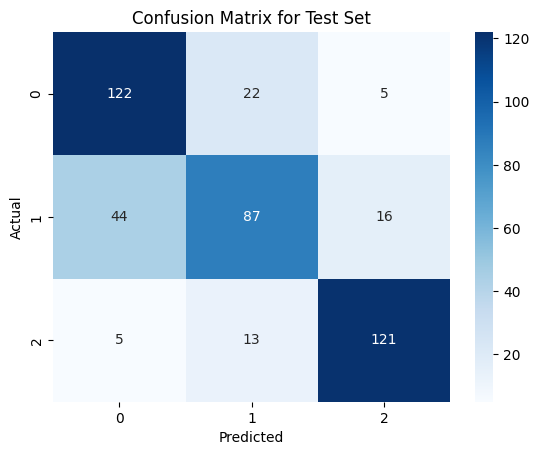

Precision: 75.76
Recall: 75.86
F1 Score: 75.50


In [ ]:
def random_forest_classifier(X_train, Y_train, X_test, Y_test):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
        'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
    }

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier()

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predicting on the training set with the best model
    Y_train_pred = grid_search.predict(X_train)

    # Predicting on the test set with the best model
    Y_test_pred = grid_search.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}')
    print(f'Recall: {recall * 100:.2f}')
    print(f'F1 Score: {f1 * 100:.2f}')

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
random_forest_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 92.28%
Test Accuracy: 77.93%


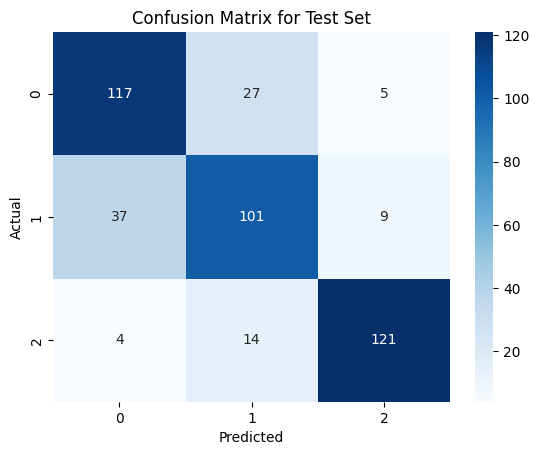

In [ ]:
def catboost_classifier(X_train, Y_train, X_test, Y_test):


    # Initialize the CatBoost model
    catboost_model = CatBoostClassifier(silent=True)

    # Train the model on the training data
    catboost_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = catboost_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = catboost_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
catboost_classifier(X_train, Y_train, X_test, Y_test)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 6, 'border_count': 32}
Training Accuracy: 83.87%
Test Accuracy: 76.32%
Precision: 76.43%
Recall: 76.32%
F1 Score: 76.24%


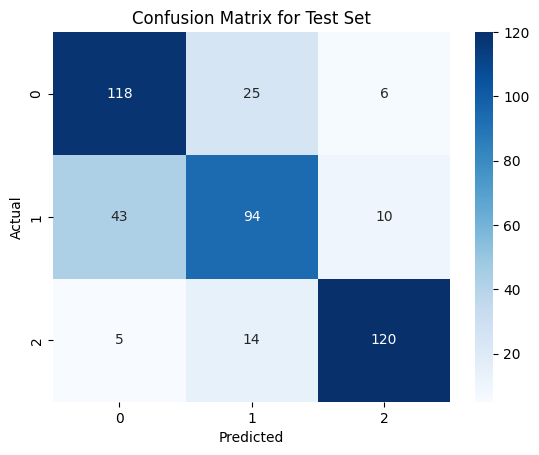

In [ ]:
def catboost_classifier(X_train, Y_train, X_test, Y_test):
    # Simplified parameter grid for faster search
    param_grid = {
        'iterations': [100, 200],  # Fewer boosting rounds
        'learning_rate': [0.01, 0.1, 0.2],  # Conservative learning rates
        'depth': [4, 6],  # Shallow trees for faster training
        'l2_leaf_reg': [1, 3],  # Fewer regularization levels
        'border_count': [32],  # Fixed border count for simplicity
    }

    # Initialize the CatBoost model with early stopping
    catboost_model = CatBoostClassifier(silent=True, early_stopping_rounds=20)

    # Use RandomizedSearchCV with reduced trials
    grid_search = RandomizedSearchCV(
        estimator=catboost_model,
        param_distributions=param_grid,
        scoring='accuracy',
        cv=2,  # Fewer folds to speed up
        n_jobs=-1,
        verbose=1,
        n_iter=5  # Reduced number of iterations
    )

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predicting on the training and test sets
    Y_train_pred = grid_search.predict(X_train)
    Y_test_pred = grid_search.predict(X_test)

    # Calculating and printing accuracies
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Calculating additional metrics
    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')

    # Plotting confusion matrix
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
catboost_classifier(X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 76.21%
Test Accuracy: 69.89%


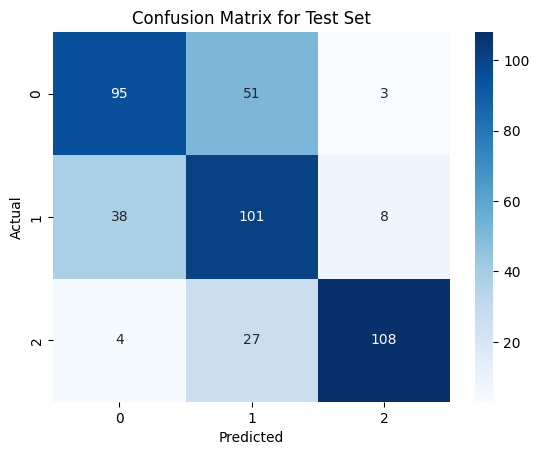

In [ ]:
def adaboost_classifier(X_train, Y_train, X_test, Y_test):


    # Initialize the base model (Decision Tree)
    base_model = DecisionTreeClassifier(max_depth=1)  # Using a Decision Stump as the base learner

    # Initialize the AdaBoost model
    ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=50)  # Use 'estimator' instead of 'base_estimator'

    # Train the model on the training data
    ada_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = ada_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = ada_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
adaboost_classifier(X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 85.20%
Test Accuracy: 72.87%


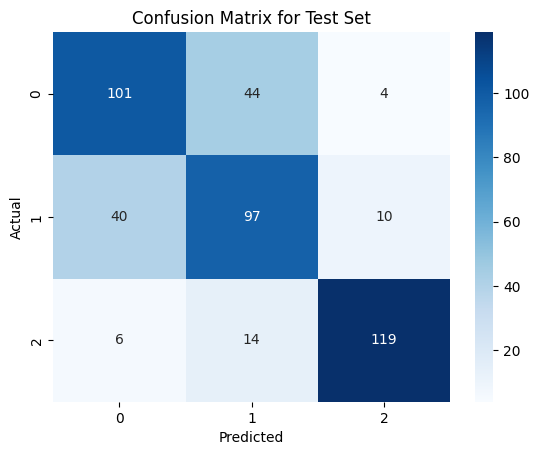

Precision: 73.27%
Recall: 72.87%
F1 Score: 73.04%


In [ ]:
def adaboost_classifier(X_train, Y_train, X_test, Y_test):
    # Initialize the base model (Decision Tree)
    base_model = DecisionTreeClassifier(max_depth=1)  # Using a Decision Stump as the base learner

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of weak learners
        'learning_rate': [0.01, 0.1, 1, 10],  # Weight applied to each classifier
        'estimator__max_depth': [1, 2, 3]  # Depth of the base learner (Decision Tree)
    }

    # Initialize the AdaBoost model with the base estimator
    ada_model = AdaBoostClassifier(estimator=base_model)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predicting on the training set with the best model
    Y_train_pred = grid_search.predict(X_train)

    # Predicting on the test set with the best model
    Y_test_pred = grid_search.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')


# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
adaboost_classifier(X_train, Y_train, X_test, Y_test)

Training Accuracy: 96.03%
Test Accuracy: 77.93%


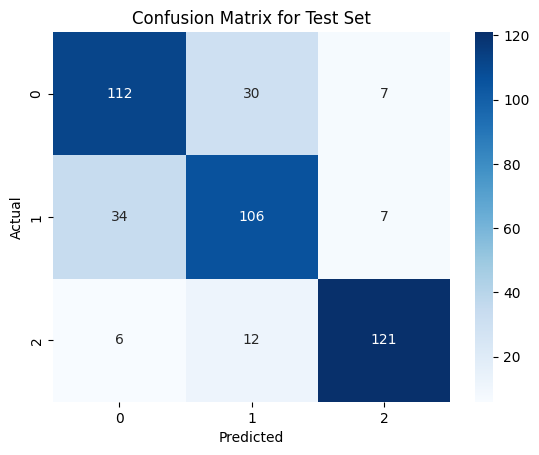

In [ ]:
def xgboost_classifier(X_train, Y_train, X_test, Y_test):
    """
    Function to train and evaluate an XGBoost model on the given data.

    Parameters:
    X_train: Training features
    Y_train: Training labels
    X_test: Test features
    Y_test: Test labels
    """

    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')  # You can adjust parameters like n_estimators, max_depth, etc.

    # Train the model on the training data
    xgb_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = xgb_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = xgb_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
xgboost_classifier(X_train, Y_train, X_test, Y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:49:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Training Accuracy: 84.68%
Test Accuracy: 76.78%
Precision: 77.02%
Recall: 76.78%
F1 Score: 76.89%


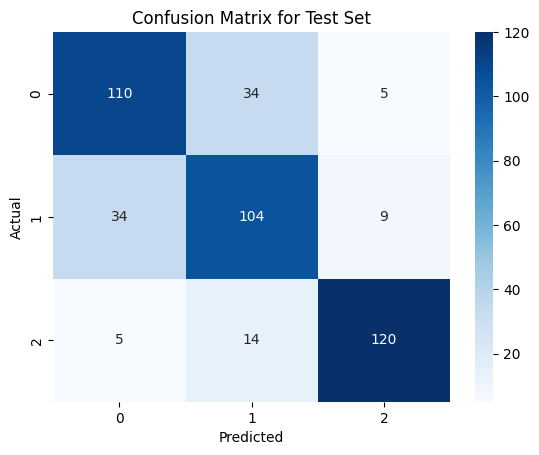

In [ ]:
def xgboost_classifier(X_train, Y_train, X_test, Y_test):
    # Parameter grid for XGBoost
    param_grid = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

    # RandomizedSearchCV for hyperparameter tuning
    grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                     scoring='accuracy', cv=3, n_iter=10, n_jobs=-1, verbose=1)

    # Train the model
    grid_search.fit(X_train, Y_train)

    # Display the best parameters
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predict on train and test data
    Y_train_pred = grid_search.predict(X_train)
    Y_test_pred = grid_search.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Precision, Recall, F1 Score
    precision = precision_score(Y_test, Y_test_pred, average='weighted')
    recall = recall_score(Y_test, Y_test_pred, average='weighted')
    f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')

    # Confusion Matrix
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
# Adjust the labels to start from 0 if needed


# Call the classifier with adjusted labels
xgboost_classifier(X_train, Y_train, X_test, Y_test)


Training Accuracy: 69.82%
Test Accuracy: 44.37%


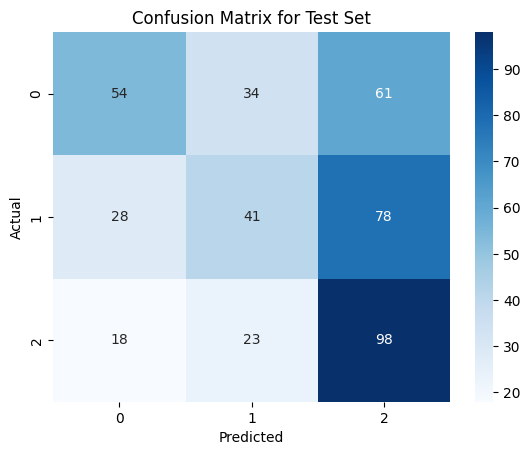

In [ ]:
def naive_bayes_classifier(X_train, Y_train, X_test, Y_test):


    # Convert sparse matrices to dense if needed
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    # Initialize the Naive Bayes model
    nb_model = GaussianNB()  # You can use different variants like MultinomialNB or BernoulliNB as needed

    # Train the model on the training data
    nb_model.fit(X_train, Y_train)

    # Predicting on the training set
    Y_train_pred = nb_model.predict(X_train)

    # Predicting on the test set
    Y_test_pred = nb_model.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
naive_bayes_classifier(X_train, Y_train, X_test, Y_test)

Best Parameters: {'var_smoothing': 1e-06}
Training Accuracy: 71.31%
Test Accuracy: 45.06%


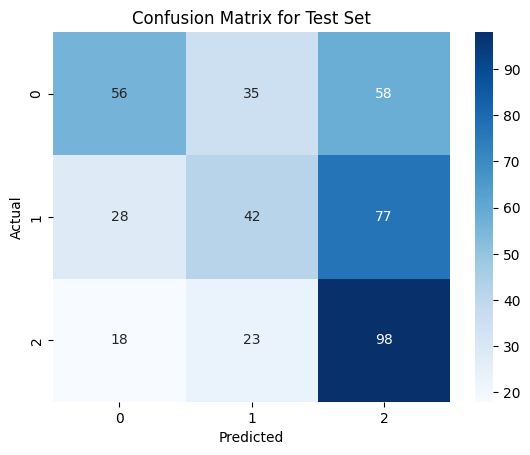

In [ ]:
def naive_bayes_classifier(X_train, Y_train, X_test, Y_test):
    # Convert sparse matrices to dense if needed
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
    if hasattr(X_test, 'toarray'):
        X_test = X_test.toarray()

    # Initialize the Naive Bayes model
    nb_model = GaussianNB()

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Smoothing parameter
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid,
                               scoring='accuracy', cv=5, n_jobs=-1)

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, Y_train)

    # Best parameters from the grid search
    print(f"Best Parameters: {grid_search.best_params_}")

    # Predicting on the training set with the best model
    Y_train_pred = grid_search.predict(X_train)

    # Predicting on the test set with the best model
    Y_test_pred = grid_search.predict(X_test)

    # Calculating accuracy for the training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

    # Calculating accuracy for the test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Confusion matrix for the test set
    test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Test Set')
    plt.show()

# Example usage (assuming you have X_train, Y_train, X_test, Y_test):
naive_bayes_classifier(X_train, Y_train, X_test, Y_test)

In [ ]:
Xa = viva_dataset['Transcript'].values
Ya = viva_dataset['Label_Num'].values
print(Xa)

["Yeah. So can you tell me now? We'll go one after another. First, we'll start with the udhab Bhaskar. Then we'll go to Balaji. OK. OK, OK. Yeah. So tell me."
 'What is sampling? What is sampling?'
 'Sampling means it is the process of converting a continual signal into discrete signal.'
 ... 'OK. Thank you very much. So basically, yes Sir.'
 'You are saying something?'
 'No, Sir. No, Sir. Thank you. Have a good evening. Bye.']


In [ ]:
!pip install transformers torch

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the entire NumPy array
inputs = tokenizer(Xa.tolist(), padding=True, truncation=True, return_tensors="pt")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
